<a href="https://colab.research.google.com/github/caio-emiliano/data_science/blob/main/classificacao_gaussianas_perceptron/Implementa%C3%A7%C3%A3o_do_Perceptron_para_classifica%C3%A7%C3%A3o_de_distribui%C3%A7%C3%B5es_gaussianas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificação de distribuições gaussianas via Perceptron (implementado manualmente)

O objetivo desse trabalho é explorar o uso do perceptron, um algoritmo clássico de aprendizado de máquina, para a classificação de distribuições gaussianas. As distribuições gaussianas, também conhecidas como distribuições normais, desempenham um papel fundamental em diversos campos da ciência e da engenharia, sendo amplamente utilizadas para modelar fenômenos naturais e artificiais.

A classificação correta das distribuições gaussianas é de grande importância em várias aplicações práticas, como reconhecimento de padrões, detecção de anomalias, diagnóstico médico e tomada de decisões em sistemas autônomos. Nesse contexto, o perceptron, um modelo de rede neural artificial de uma única camada, surge como uma ferramenta promissora para realizar essa tarefa.

Ao explorar o uso do perceptron para a classificação de distribuições gaussianas, pretendemos investigar sua capacidade de aprender e discriminar entre diferentes padrões de dados gerados a partir dessas distribuições. Para isso, usaremos um conjuntos de dados sintéticos, onde poderemos controlar os parâmetros das distribuições e avaliar a performance do perceptron na tarefa de classificação.

Por meio dessa análise, esperamos obter insights sobre a eficácia e limitações do perceptron nesse contexto específico, contribuindo para um melhor entendimento de suas capacidades e possíveis aplicações práticas. Além disso, essa investigação também pode servir como base para o aprimoramento e desenvolvimento de técnicas mais avançadas de classificação de distribuições gaussianas, auxiliando no avanço da área de aprendizado de máquina e reconhecimento de padrões.

### Importação das bibliotecas utilizadas

In [1]:
from posixpath import split
import matplotlib.pyplot as plt 
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split
from copy import copy

from importlib import reload

from utils import *

### Carregando os dados do problema

In [2]:
##Carregando os dados do problema
data = pd.read_csv('DATA.txt', sep=",", header=None)
data.columns = ["x1", "x2"]
data['bias'] = -1
data = data[['bias', 'x1','x2']] #Reorganizando as colunas para que o bias seja a primeira.

target = pd.read_csv('ALVOS.txt', header=None).transpose()
target.columns = ["y"]

#Convertendo o Pandas Dataframe em um numpy array
data, target = to_numpy_vector(data, target)

### Configurando os hiper-parâmetros da rede

In [3]:
#Settando os parâmetros para treino da rede
num_epochs = 20
learning_rate = 0.0025
split_percentage = 80

#Criando matriz de pesos sinápticos
W = np.array(randomFullFillMatrix([3,2], -0.9, 1))

### Split dos dados em treino e teste e conversão dos alvos para binário

In [4]:
#Dividingo conjuntos em treino e teste
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=split_percentage, random_state=100)

#Realizando a codificação binária dos nossos alvos
y_train_encoded = BinaryEncoder(y_train)
y_test_encoded = BinaryEncoder(y_test)

### Treinamento da rede Perceptron

In [5]:
#Treinamento da rede
weights = train_weights(W, X_train, y_train_encoded, learning_rate, num_epochs)

>epoch=0, lrate=0.003, num_of_samples_wrong=515.000
>epoch=1, lrate=0.003, num_of_samples_wrong=89.000
>epoch=2, lrate=0.003, num_of_samples_wrong=20.000
>epoch=3, lrate=0.003, num_of_samples_wrong=13.000
>epoch=4, lrate=0.003, num_of_samples_wrong=14.000
>epoch=5, lrate=0.003, num_of_samples_wrong=15.000
>epoch=6, lrate=0.003, num_of_samples_wrong=14.000
>epoch=7, lrate=0.003, num_of_samples_wrong=12.000
>epoch=8, lrate=0.003, num_of_samples_wrong=11.000
>epoch=9, lrate=0.003, num_of_samples_wrong=10.000
>epoch=10, lrate=0.003, num_of_samples_wrong=9.000
>epoch=11, lrate=0.003, num_of_samples_wrong=9.000
>epoch=12, lrate=0.003, num_of_samples_wrong=9.000
>epoch=13, lrate=0.003, num_of_samples_wrong=8.000
>epoch=14, lrate=0.003, num_of_samples_wrong=8.000
>epoch=15, lrate=0.003, num_of_samples_wrong=8.000
>epoch=16, lrate=0.003, num_of_samples_wrong=7.000
>epoch=17, lrate=0.003, num_of_samples_wrong=7.000
>epoch=18, lrate=0.003, num_of_samples_wrong=6.000
>epoch=19, lrate=0.003, num_of

### Realizando o predict dos dados no conjunto de teste

In [6]:
#Rodando as predições para o conjunto de teste

Resultado=[]

# O = X*W
O = np.zeros((X_test.shape[0], 2))

for i in range(X_test.shape[0]):

	for j in range(2):

		for k in range(3):

			O[i][j] = O[i][j] + X_test[i][k] * W[k][j]

		O[i][j] = heaviside(O[i][j])

	if((O[i][0] == 0) and (O[i][1] == 0)):

		Resultado.append(int(1))

	elif((O[i][0] == 1) and (O[i][1] == 0 ) ):	

		Resultado.append(int(2))

	else:

		Resultado.append(int(3))

### Plotagem dos gráficos

In [7]:
#Garantindo que as matrizes de pesos sejam do tipo np array
weight_neuron1 = np.asarray(weight_neuron1, dtype=np.float32)
weight_neuron2 = np.asarray(weight_neuron2, dtype=np.float32)

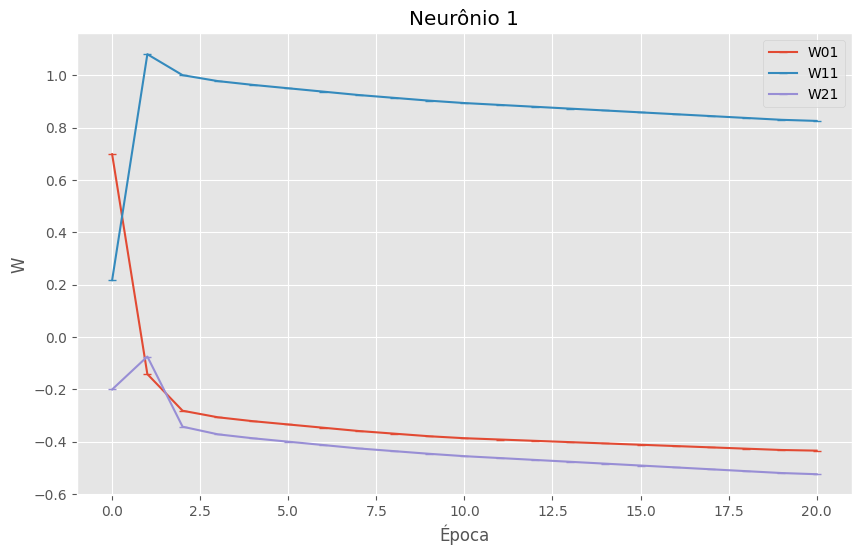

In [8]:
#Plotagem dos gráficos
plt.style.use('ggplot')

'''Plotando pesos neurônios x épocas'''
plt1, ax1 = plt.subplots(figsize=(10, 6))

lista_epochs = [i for i in range(num_epochs+1)]

for i in range(weight_neuron1.shape[1]):
    ax1.plot(lista_epochs, weight_neuron1[:,i], marker = '_', label = f"W{i}1")

ax1.set_title('Neurônio 1') 
plt.xlabel("Época")
plt.ylabel("W")
plt.legend()

plt.show()

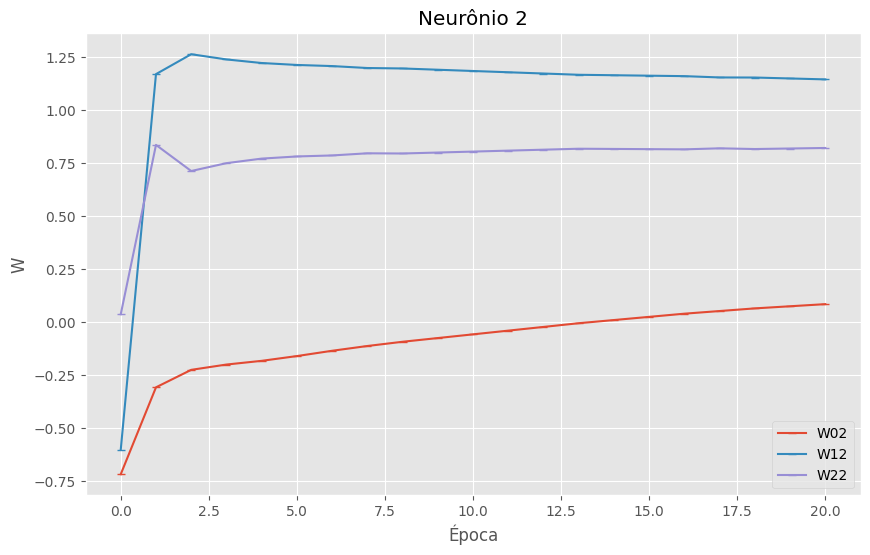

In [9]:
'''Plotando pesos neurônios x épocas'''
plt2, ax2 = plt.subplots(figsize=(10, 6))
for i in range(weight_neuron2.shape[1]):
    ax2.plot(lista_epochs, weight_neuron2[:,i], marker = '_', label = f"W{i}2")

ax2.set_title('Neurônio 2')
plt.xlabel("Época")
plt.ylabel("W")
plt.legend()

'''
np.where retorna True na posição 0, e falso na posição [1]
Assim nós teremos: X_test -> BIAS, X1, X2 para y = 1. Então pegaremos todas as linhas e a coluna desejada
'''

x1 =  X_test[ np.where(y_test == 1)[0] ][:,1]
y1 = X_test[ np.where(y_test == 1)[0] ][:,2]
x2 = X_test[ np.where(y_test == 2)[0] ][:,1]
y2 = X_test[ np.where(y_test == 2)[0] ][:,2]
x3 = X_test[ np.where(y_test == 3)[0] ][:,1]
y3 = X_test[ np.where(y_test == 3)[0] ][:,2]

plt.show()

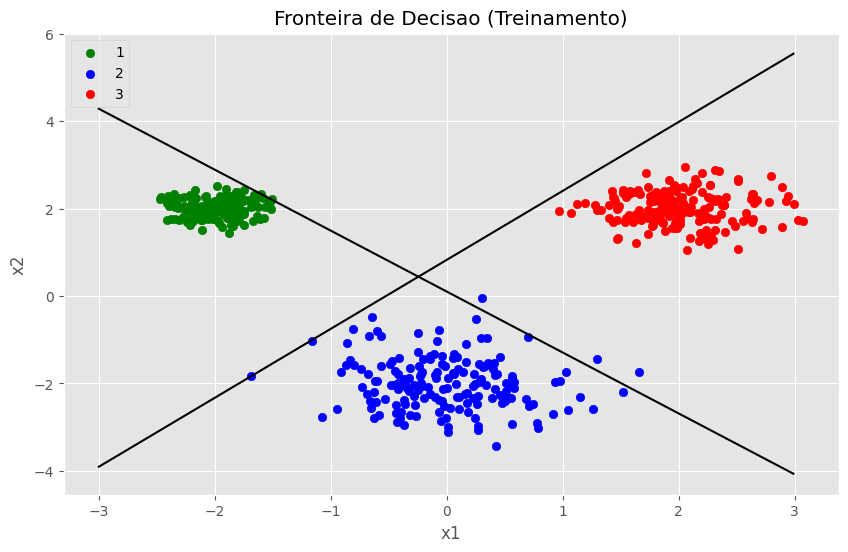

In [11]:
'''Plotando Fronteira de Decisao (Treinamento)'''
plt4, ax4 = plt.subplots(figsize=(10, 6))

ax4.scatter(x1, y1, color='g',label= "1") 
ax4.scatter(x2, y2, color='b',label= "2") 
ax4.scatter(x3, y3, color='r',label= "3") 

x = np.arange(-3., 3., 0.01)      
y = W[0][0]/W[2][0] - (W[1][0]/W[2][0])*x
ax4.plot(x, y, color='black')

x = np.arange(-3., 3., 0.01)      
y = W[0][1]/W[2][1] - (W[1][1]/W[2][1])*x
ax4.plot(x, y, color='black')

ax4.set_title('Fronteira de Decisao (Treinamento)') 
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.legend()

plt.show()

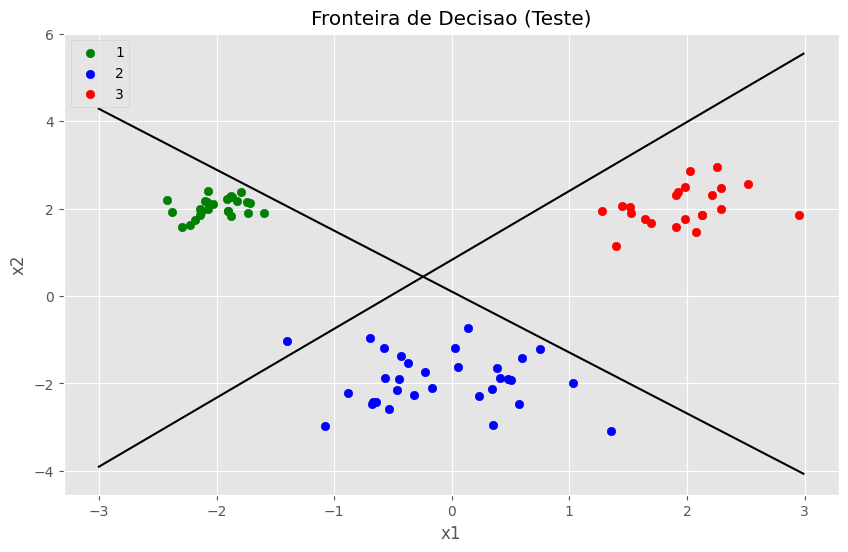

In [10]:
'''Plotando Fronteira de Decisao (Teste)'''
plt3, ax3 = plt.subplots(figsize=(10, 6))

ax3.scatter(x1, y1, color='g',label= "1") 
ax3.scatter(x2, y2, color='b',label= "2") 
ax3.scatter(x3, y3, color='r',label= "3") 

x = np.arange(-3., 3., 0.01)      
y = W[0][0]/W[2][0] - (W[1][0]/W[2][0])*x
ax3.plot(x, y, color='black')

x = np.arange(-3., 3., 0.01)      
y = W[0][1]/W[2][1] - (W[1][1]/W[2][1])*x
ax3.plot(x, y, color='black')

ax3.set_title('Fronteira de Decisao (Teste)') 
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

x1 =  X_train[ np.where(y_train == 1)[0] ][:,1]
y1 = X_train[ np.where(y_train == 1)[0] ][:,2]
x2 = X_train[ np.where(y_train == 2)[0] ][:,1]
y2 = X_train[ np.where(y_train == 2)[0] ][:,2]
x3 = X_train[ np.where(y_train == 3)[0] ][:,1]
y3 = X_train[ np.where(y_train == 3)[0] ][:,2]

plt.show()

## Conclusão

Concluímos, através da inspeção visual do gráfico, que o algoritmo do Perceptron (implementado manualmente aqui) convergiu para um resultado satisfatório. 

É possível ver bem a separação entre as 3 classes, tanto no conjunto de treinamento como no conjunto de teste. Como não houve vazamento de dados (pois realizamos devidamente o split dos dados), podemos concluir que não houve overffit.